In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [143]:
df = pd.read_csv("/Users/emre/Documents/IU Data Science/2022/3 Machine Learning - Unsupervised Project/archive/mental-heath-in-tech-2016_20161114.csv")

In [148]:
df.head(0)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

## Cleaning Data 

### Rename all columns to make further investigation easier

In order to optimize the truncation of the questions here are some abbreviations:
- mh = mental health
- ph = physical health
- neg = negative
- pos = pos
- diag = diagnosed
- prev = previous

In [152]:
columns_new = [
    'self_employed',
    'company_size',
    'tech_comp_flag',
    'tech_role_flag',
    'mh_coverage_flag',
    'mh_coverage_awareness_flag',
    'mh_employer_discussion_flag',
    'mh_resources_provided_flag',
    'mh_anonimity_flag',
    'mh_sick_leave',
    'mh_discussion_neg_impact',
    'ph_discussion_neg_impact',
    'mh_discussion_coworkers',
    'mh_discussion_supervisor',
    'mh_versus_ph_employer',
    'mh_consequence_coworkers',
    'mh_coverage_flag2',
    'mh_online_resources_flag',
    'mh_diagnosed&reveal_clients_flag',
    'mh_diagnosed&reveal_clients_impact',
    'mh_diagnosed&reveal_coworkers_flag',
    'mh_coworkers_reveal_neg_impact',
    'mh_productivity_impact',
    'mh_productivity_impact_percentage',
    'prev_employers_flag',
    'prev_employers_mh_benefits',
    'prev_employers_mh_benefits_awareness',
    'prev_employers_mh_discussion',
    'prev_employers_mh_resources',
    'prev_employers_mh_anonimity',
    'prev_employers_mh_discuss_neg_consequences',
    'prev_employers_ph_discuss_neg_consequences',
    'prev_employers_mh_discussion_cowork',
    'prev_employers_mh_discussion_supervisor',
    'prev_employers_mh_importance_employer',
    'prev_employers_mh_consequences_coworkers',
    'future_employers_ph_specification',
    'why/why_not',
    'future_employers_mh_specification',
    'why/why_not2',
    'mh_hurt_on_career',
    'mh_neg_view_coworkers',
    'mh_sharing_friends/fam_flag',
    'mh_bad_response_workplace',
    'mh_for_others_bad_response_workplace',
    'mh_family_history',
    'mh_disorder_past',
    'mh_disorder_current',
    'yes:what_diag?',
    'maybe:whats_your_diag',
    'mh_diag_professional',
    'yes:condition_diag',
    'mh_sought_professional_treatment',
    'mh_effective_treat_impact_on_work',
    'mh_not_effective_treat_impact_on_work',
    'age',
    'sex',
    'country_live',
    'live_us_teritory',
    'country_work',
    'work_us_teritory',
    'work_position',
    'remote_flag'
]

In [153]:
df.columns = columns_new

In [154]:
df.columns

Index(['self_employed', 'company_size', 'tech_comp_flag', 'tech_role_flag',
       'mh_coverage_flag', 'mh_coverage_awareness_flag',
       'mh_employer_discussion_flag', 'mh_resources_provided_flag',
       'mh_anonimity_flag', 'mh_sick_leave', 'mh_discussion_neg_impact',
       'ph_discussion_neg_impact', 'mh_discussion_coworkers',
       'mh_discussion_supervisor', 'mh_versus_ph_employer',
       'mh_consequence_coworkers', 'mh_coverage_flag2',
       'mh_online_resources_flag', 'mh_diagnosed&reveal_clients_flag',
       'mh_diagnosed&reveal_clients_impact',
       'mh_diagnosed&reveal_coworkers_flag', 'mh_coworkers_reveal_neg_impact',
       'mh_productivity_impact', 'mh_productivity_impact_percentage',
       'prev_employers_flag', 'prev_employers_mh_benefits',
       'prev_employers_mh_benefits_awareness', 'prev_employers_mh_discussion',
       'prev_employers_mh_resources', 'prev_employers_mh_anonimity',
       'prev_employers_mh_discuss_neg_consequences',
       'prev_employers

After changing the column names to more readable and shorter versions, we can easily view the values and types of entries next.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   self_employed                               1433 non-null   int64  
 1   company_size                                1146 non-null   object 
 2   tech_comp_flag                              1146 non-null   float64
 3   tech_role_flag                              263 non-null    float64
 4   mh_coverage_flag                            1146 non-null   object 
 5   mh_coverage_awareness_flag                  1013 non-null   object 
 6   mh_employer_discussion                      1146 non-null   object 
 7   mh_resources_provided                       1146 non-null   object 
 8   mh_anonimity_flag                           1146 non-null   object 
 9   mh_sick_leave                               1146 non-null   object 
 10  mh_discussio

There are two things that immediately stand out:
1. The dtype can be improved by adjusting clear booleans, integers, and floats
2. There are a lot of missing values in this dataset

Let's get a visual on the missing values first.

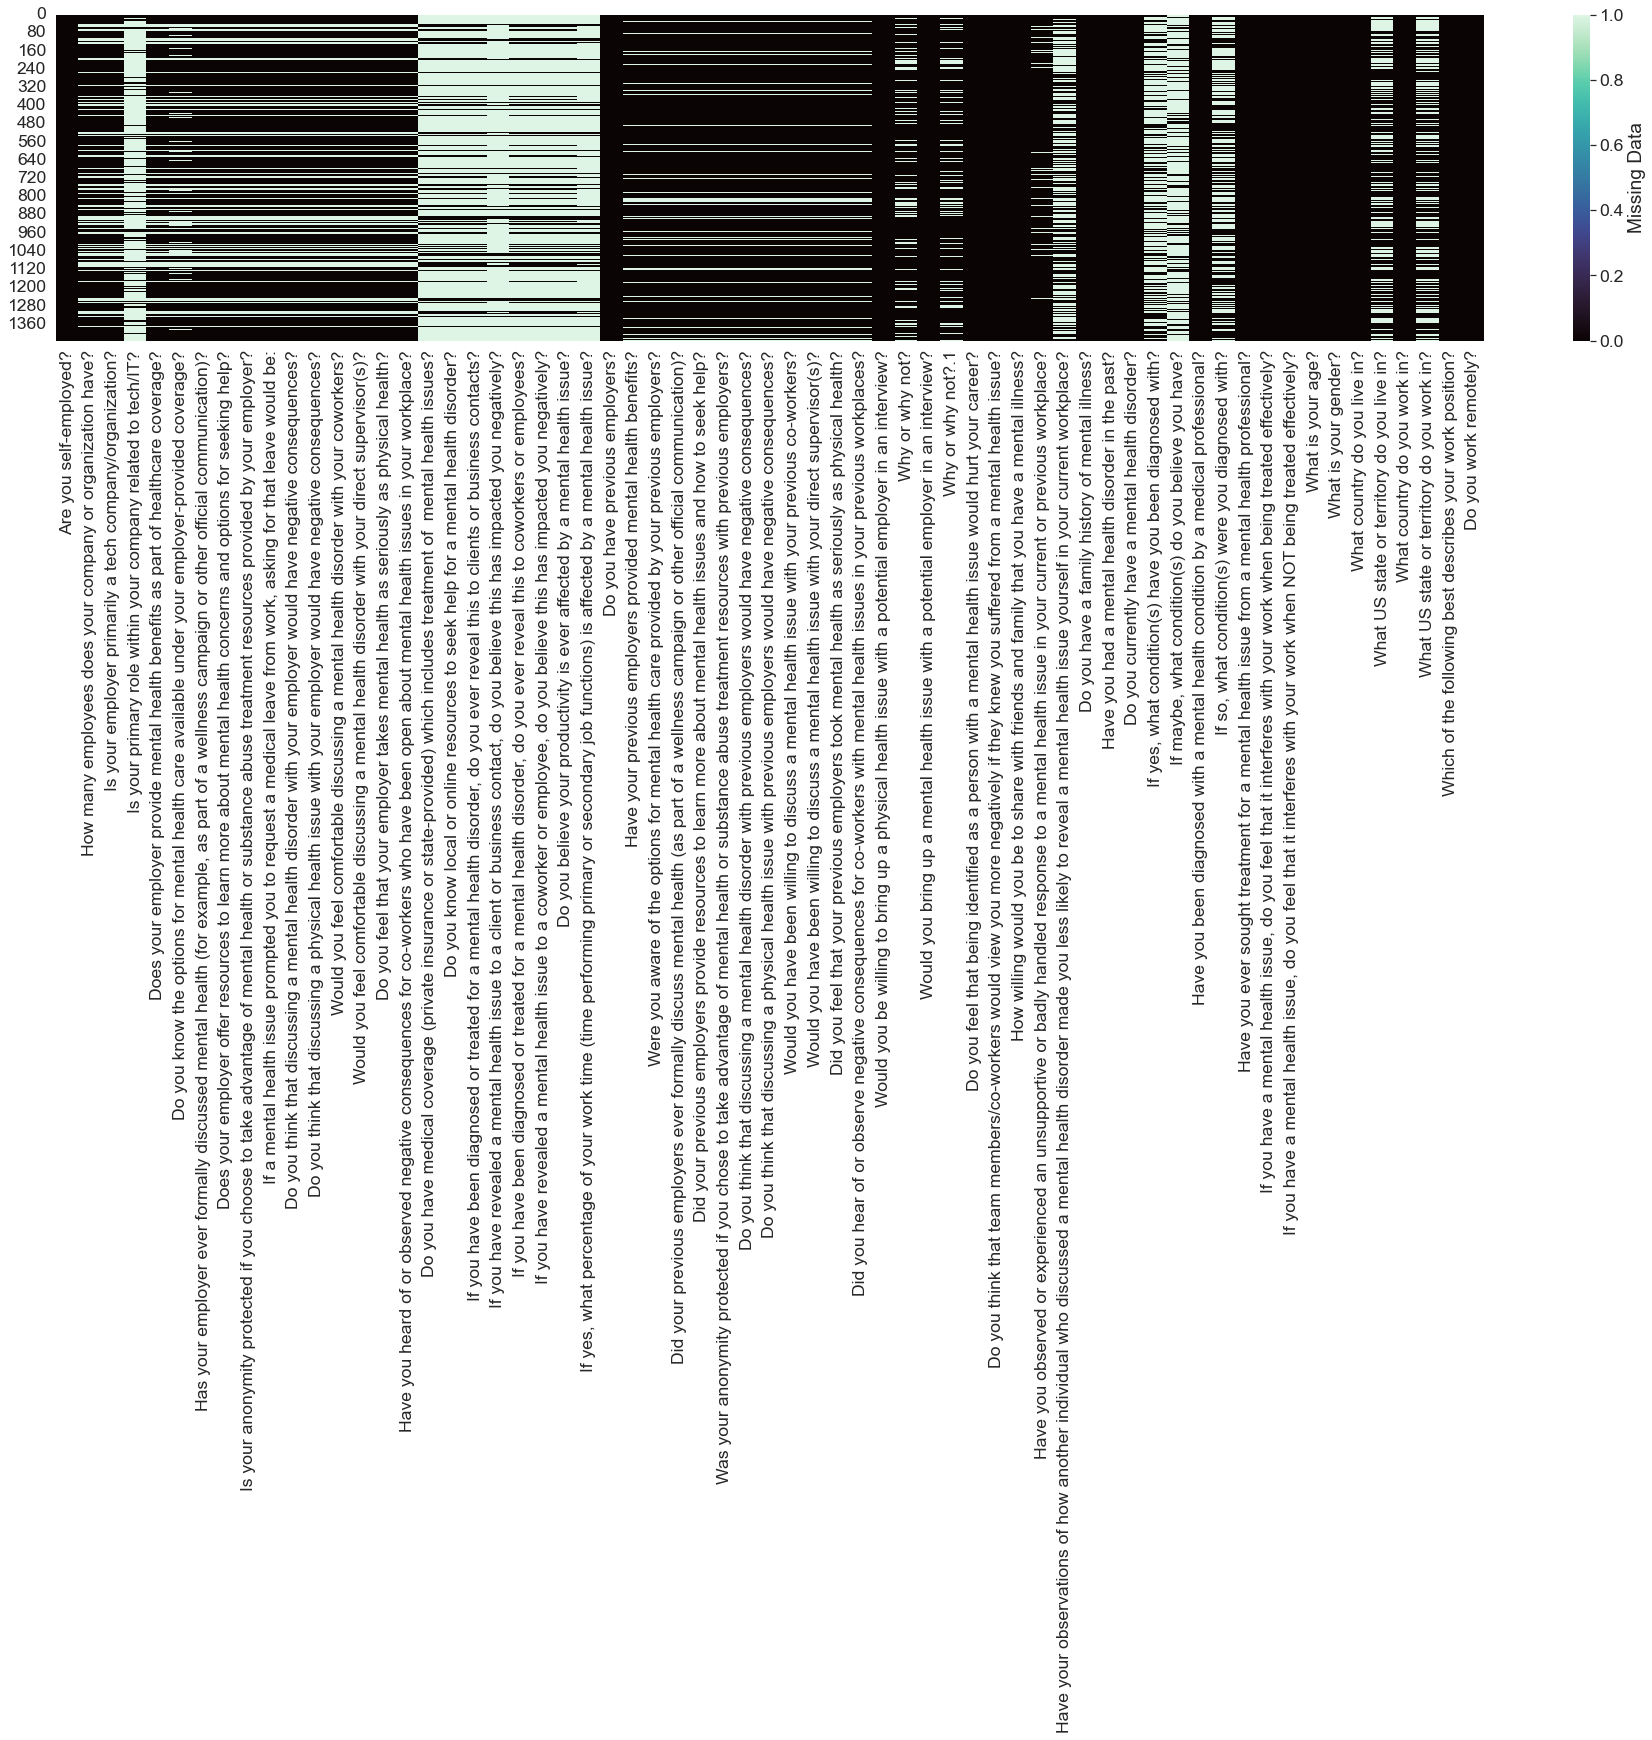

In [146]:
sns.set(font_scale=1.6)
plt.figure(figsize=(32,6))
sns.heatmap(df.isna(),
            cmap="mako",
            cbar_kws={'label': 'Missing Data'})
plt.show()

# Saving the graph as png for later use
# plt.savefig("Missing_values_as_heatmap.png", dpi=300, format="png")

This graphic shows clearly that a lot of data is missing especially in the section after the second mental health coverage question comes up. It is going to be important to figure out why this section in particular wasn't answered by participants.
One of the striking features of this survey is that the questionof mental health healthcare coverge appears twice. The visualization also shows that there is a inverted relationship between answering the first part compared to the second part of healthcare questions. To further investigate this, let's confirm whether the second section of questions are aimed at self-employed survey takers.

In [187]:
# Count all employed survey takers(survey takers who are employed answered with 0 in the survey)
mask_employed = df.self_employed == 0
count_employed = df[mask_employed].mh_coverage_flag2.isna().count()

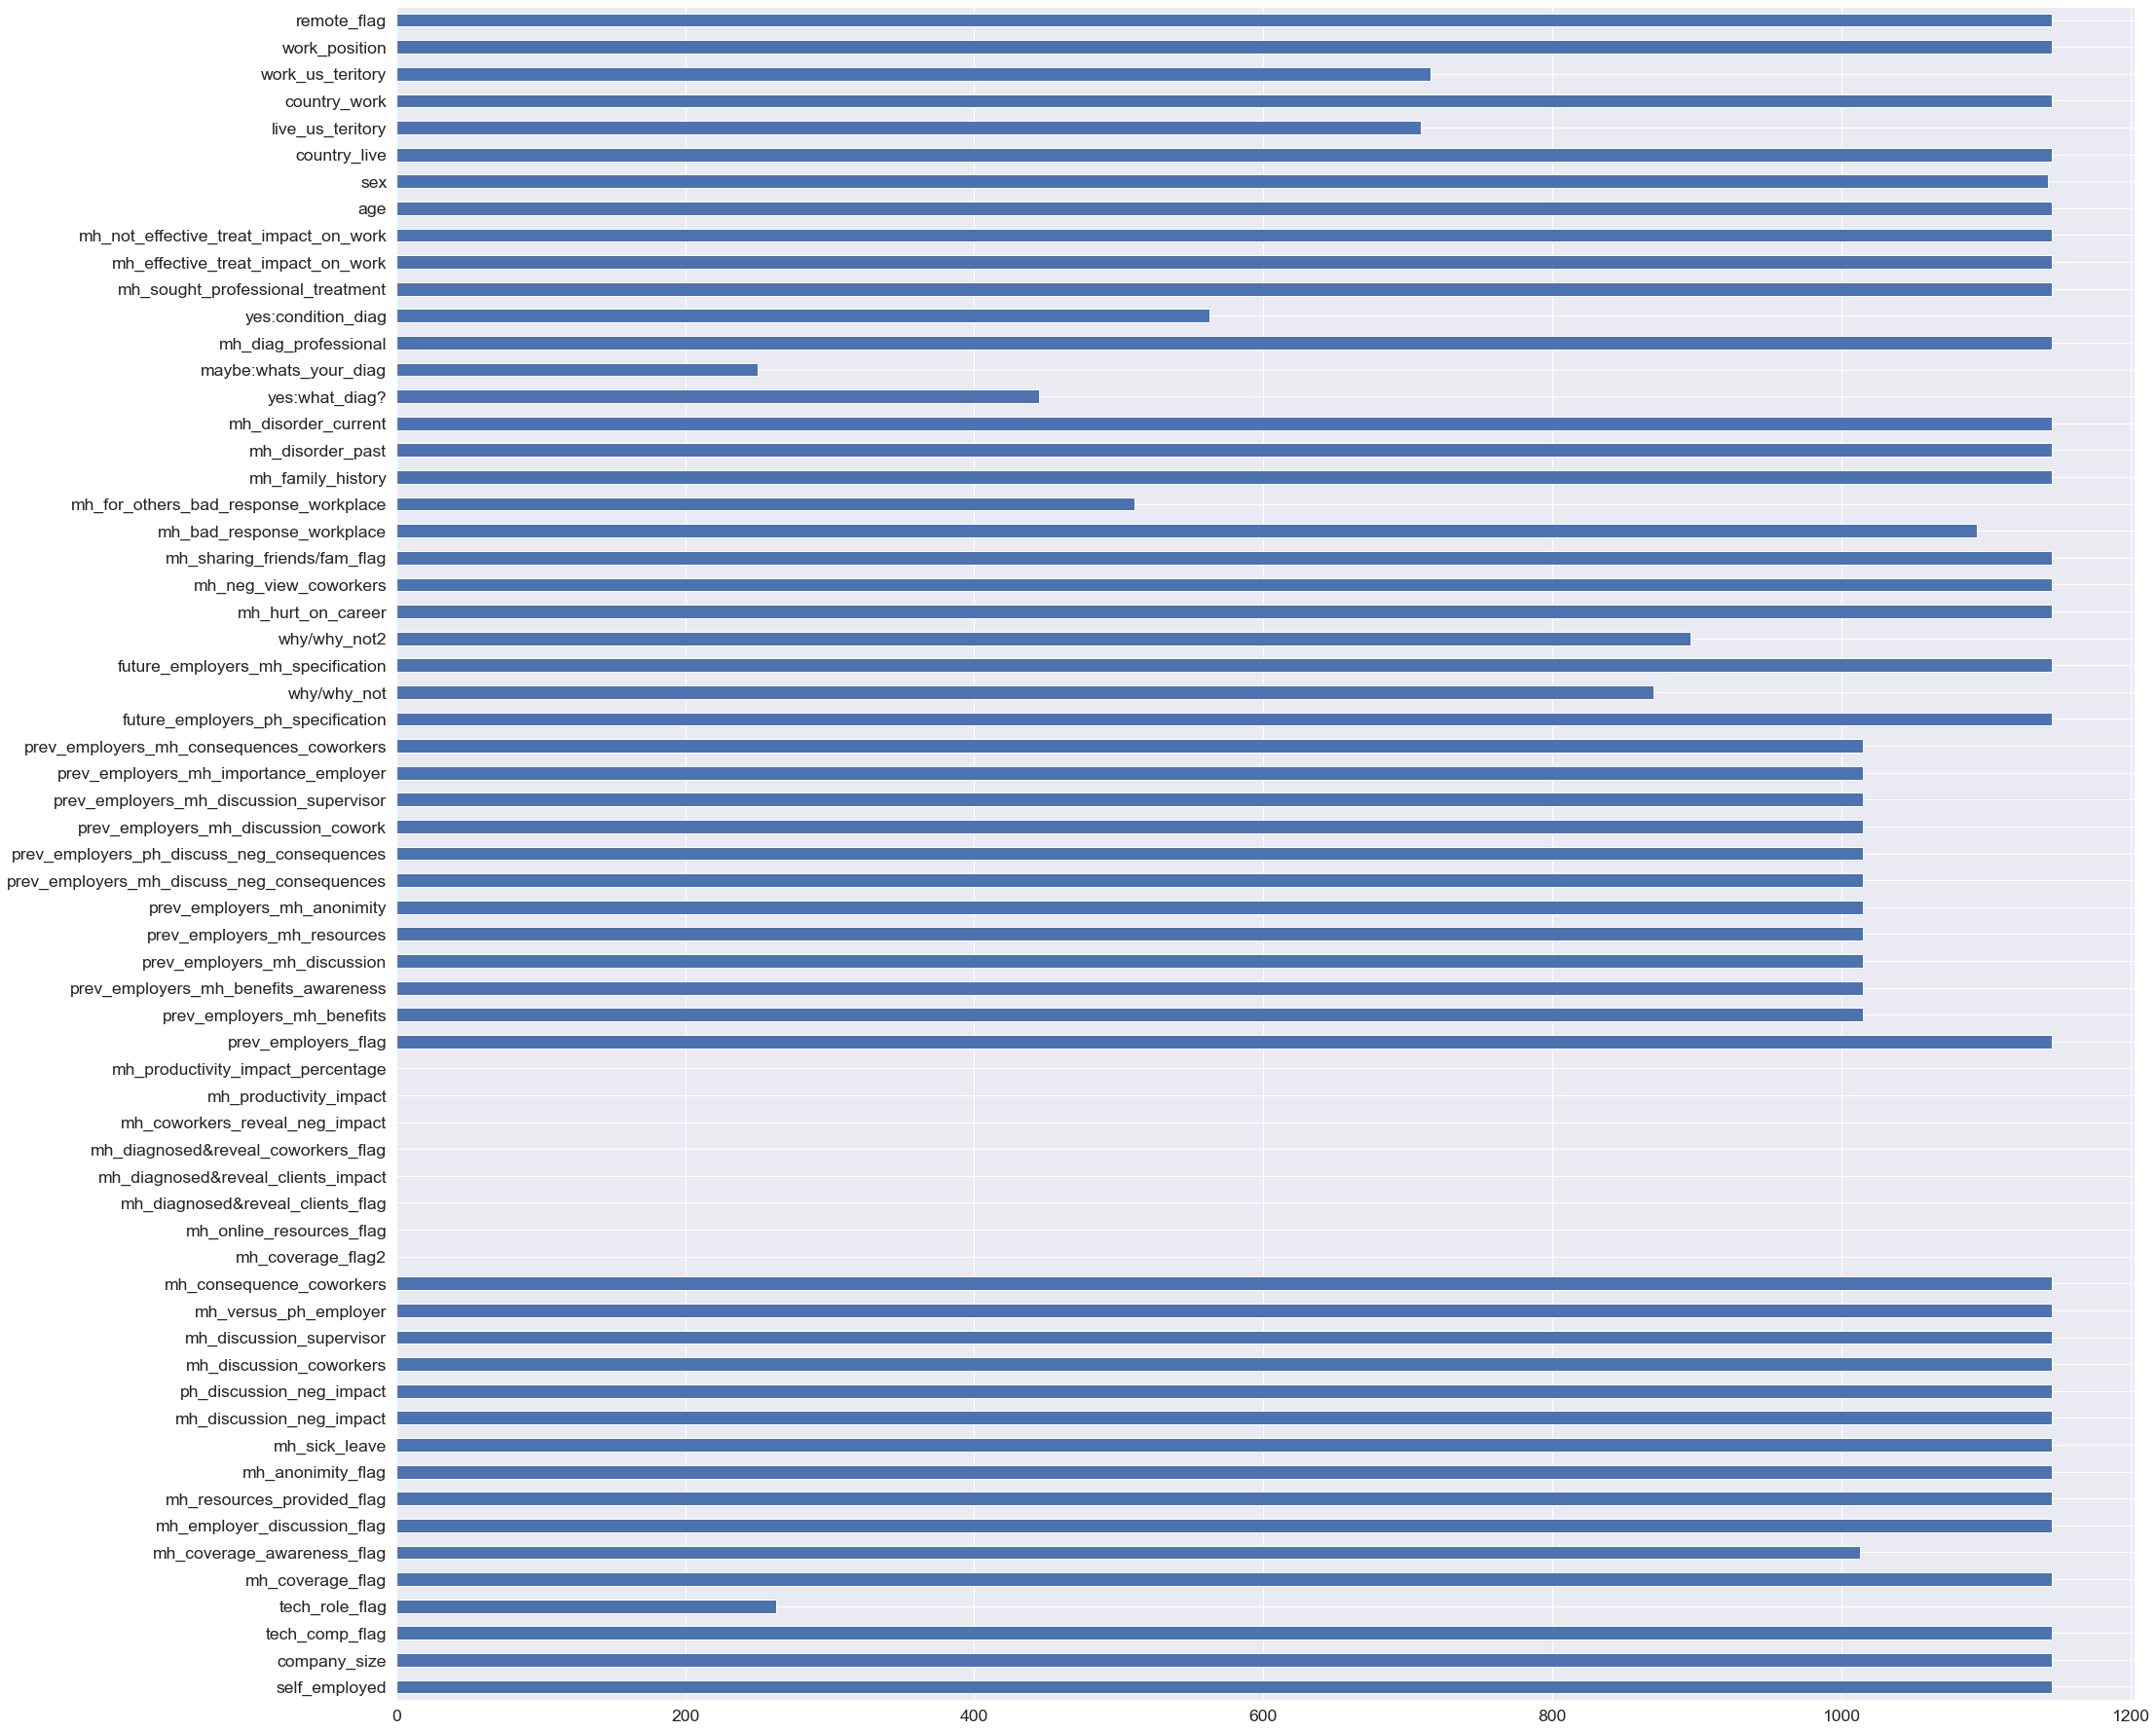

In [203]:
mask_employed_count = df[mask_employed].count()
plt.figure(figsize=(32,32))
mask_employed_count.plot(kind="barh")
plt.show()

# Transforming the features
Each feature is a long question which is very confusing to work with. Therefore, the features shall be renamed to reduce the complexity of each column.